<a href="https://colab.research.google.com/github/kdmwangi/Data-Science/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

<li>Build a machine learning model to identify fraudulent credit card
transactions.
<li>Preprocess and normalize the transaction data, handle class
imbalance issues, and split the dataset into training and testing sets.
<li>Train a classification algorithm, such as logistic regression or random
forests, to classify transactions as fraudulent or genuine.
Evaluate the model's performance using metrics like precision, recall,
and F1-score, and consider techniques like oversampling or
undersampling for improving results.


The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# Import Statements

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%pip install black

%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.2 MB/s eta 0:00:00


In [2]:
!black /content/drive/MyDrive/'Colab Notebooks'/'Fraud_Detection.ipynb'

Usage: black [OPTIONS] SRC ...
Try 'black -h' for help.

Error: Invalid value for 'SRC ...': Path '/content/drive/MyDrive/Colab Notebooks/Fraud_Detection.ipynb' does not exist.


In [3]:
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [4]:
dataset = pd.read_csv("creditcard.csv")

# Data Exploration

In [5]:
dataset.shape

(9965, 31)

In [6]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9960,14837,1.286884,-0.124610,0.148283,-0.259343,0.248357,0.896718,-0.626627,0.227693,1.618678,...,-0.381864,-0.904515,-0.027985,-1.743540,0.090885,0.870425,-0.084116,-0.022744,12.18,0.0
9961,14854,1.318742,0.496408,0.114876,0.695262,0.170133,-0.537180,0.025492,-0.272931,1.267298,...,-0.484943,-1.111176,0.028259,-0.549934,0.328634,0.106061,-0.046154,0.017304,1.78,0.0
9962,14857,1.241757,0.419587,0.806183,0.894811,-0.507886,-1.118126,0.018908,-0.343335,1.210781,...,-0.379396,-0.817785,0.181425,0.662879,0.172535,0.033636,-0.051084,0.017208,1.29,0.0
9963,14861,1.304800,-0.052885,0.415235,-0.081725,-0.223525,0.097752,-0.561240,0.067228,1.617203,...,-0.379597,-0.929204,0.020955,-0.877006,0.084384,0.807465,-0.099851,-0.015404,4.72,0.0
9964,14864,-1.747939,3.712444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,9965.000000,9965.000000,9965.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,...,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000
mean,5934.484897,-0.241681,0.280693,0.906359,0.260247,-0.046342,0.132335,-0.071847,-0.065317,0.801220,...,-0.052099,-0.152091,-0.033426,0.021638,0.087302,0.108328,0.005614,0.003051,62.968359,0.003814
std,4449.407112,1.522695,1.308882,1.156948,1.440500,1.183634,1.307586,1.077872,1.260140,1.156424,...,0.914735,0.631310,0.488203,0.593818,0.428128,0.562661,0.411434,0.266532,184.626707,0.061641
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.000000
25%,2061.000000,-1.012157,-0.208591,0.412198,-0.615591,-0.643060,-0.630075,-0.542336,-0.190495,0.069439,...,-0.268191,-0.548412,-0.174222,-0.327438,-0.157704,-0.328193,-0.084489,-0.015751,5.000000,0.000000
50%,4547.000000,-0.372624,0.286179,0.943149,0.218492,-0.153090,-0.153577,-0.054658,0.012466,0.804930,...,-0.123101,-0.136078,-0.046009,0.079935,0.121180,0.043395,-0.004505,0.015904,15.950000,0.000000
75%,10163.000000,1.151506,0.900823,1.601871,1.119367,0.371762,0.503376,0.476280,0.273016,1.506066,...,0.032707,0.247913,0.081288,0.410877,0.359418,0.478249,0.121045,0.077418,50.792500,0.000000
max,14864.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9965 non-null   int64  
 1   V1      9965 non-null   float64
 2   V2      9965 non-null   float64
 3   V3      9964 non-null   float64
 4   V4      9964 non-null   float64
 5   V5      9964 non-null   float64
 6   V6      9964 non-null   float64
 7   V7      9964 non-null   float64
 8   V8      9964 non-null   float64
 9   V9      9964 non-null   float64
 10  V10     9964 non-null   float64
 11  V11     9964 non-null   float64
 12  V12     9964 non-null   float64
 13  V13     9964 non-null   float64
 14  V14     9964 non-null   float64
 15  V15     9964 non-null   float64
 16  V16     9964 non-null   float64
 17  V17     9964 non-null   float64
 18  V18     9964 non-null   float64
 19  V19     9964 non-null   float64
 20  V20     9964 non-null   float64
 21  V21     9964 non-null   float64
 22  

In [11]:
dataset.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [12]:
# highest amount
print(f"{dataset['Amount'].max()} is the highest amount")
# least amount
print(f"{dataset['Amount'].min()} is the least amount")

7712.43 is the highest amount
0.0 is the least amount


In [13]:
dataset[-20:]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9945,14773,-1.233392,0.427077,2.270558,0.767506,-0.624441,1.501881,1.081309,0.147038,1.907600,...,-0.544887,-0.958546,-0.089963,-0.499914,0.502326,-0.604583,0.027913,0.023776,232.28,0.0
9946,14777,-2.034131,-1.469925,2.887500,0.089445,0.436790,-0.079851,-0.760120,0.383823,2.208430,...,0.119076,0.342250,0.201520,0.135469,0.433695,1.139899,-0.097486,0.082210,137.83,0.0
9947,14786,1.179337,-1.142020,0.437359,-0.773656,-0.559684,1.376021,-1.305236,0.289927,1.016813,...,0.191720,0.633713,-0.387845,-1.698520,0.523435,0.021760,0.012944,0.007877,122.28,0.0
9948,14786,1.299481,0.040268,0.539001,0.112052,-0.360711,-0.385239,-0.361913,-0.164338,1.693071,...,-0.389456,-0.901848,0.049543,-0.465137,0.101429,0.799592,-0.091237,0.002703,18.11,0.0
9949,14806,0.027414,0.788758,0.812775,2.089256,2.252488,4.750146,-0.462440,0.822727,0.694341,...,-0.061490,0.280934,-0.185557,0.976534,-0.301678,0.246649,-0.171406,-0.148482,15.20,0.0
9950,14811,-0.313316,-3.956487,-0.066565,-0.610102,-2.275136,0.802590,-0.508382,0.028204,-0.548007,...,0.414790,-0.133741,-0.698268,-0.322633,-0.210000,-0.190503,-0.115962,0.153883,884.00,0.0
9951,14815,1.023844,0.075666,1.357031,2.623066,-0.485721,0.869391,-0.783031,0.296112,1.203626,...,-0.101248,-0.143327,-0.102780,-0.430302,0.272983,-0.015022,-0.003773,0.022733,59.16,0.0
9952,14815,-0.427615,0.987858,1.519170,-0.678824,-0.090581,-1.273150,0.674926,-0.255767,1.076965,...,0.021988,0.458079,-0.092440,0.748920,-0.496904,0.832352,0.279384,0.207704,2.17,0.0
9953,14820,1.278769,0.724243,-0.371910,2.318614,1.093790,0.466498,0.332329,-0.102702,0.409483,...,-0.233999,-0.443006,-0.232873,-1.393502,0.799808,0.147571,-0.056502,-0.014329,7.57,0.0
9954,14830,-2.229060,-1.444154,2.116831,-2.161187,0.240141,-0.011293,-0.333354,0.296553,2.609922,...,0.071645,0.639999,-0.320172,-0.270709,0.315764,-0.011392,0.124194,-0.006802,205.00,0.0


In [14]:
# data shows that fraud data are 103 and correct data are 35638
dataset.value_counts(subset="Class")

Class
0.0    9926
1.0      38
dtype: int64

In [15]:
# total sum transacted in that day
print(f'{dataset["Amount"].sum():.0f} is the total amount transacted ')

627417 is the total amount transacted 


In [16]:
# fraud transaction total amount
dataset.groupby("Class").sum()["Amount"]

Class
0.0    624538.97
1.0      2877.76
Name: Amount, dtype: float64

In [17]:
# total time elapsed after all transaction
# average time for every transaction from the first transaction
print(
    f"{(dataset['Time'].mean()//60)//60:.0f} hours {dataset['Time'].mean()//60%60:.0f} minutes"
)

1 hours 38 minutes


In [18]:
# average amount transacted on both Class
dataset.groupby("Class").agg(["mean"])["Amount"]

,mean
Class,
0.0,62.919501
1.0,75.730526


In [19]:
# find if there is amount that is more frequent
dataset["Amount"].mode()

0    1.0
Name: Amount, dtype: float64

# Data Cleaning

In [20]:
dataset.isna().any()

Time      False
V1        False
V2        False
V3         True
V4         True
V5         True
V6         True
V7         True
V8         True
V9         True
V10        True
V11        True
V12        True
V13        True
V14        True
V15        True
V16        True
V17        True
V18        True
V19        True
V20        True
V21        True
V22        True
V23        True
V24        True
V25        True
V26        True
V27        True
V28        True
Amount     True
Class      True
dtype: bool

In [21]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [22]:
dataset[dataset["V23"].isna() == True]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9964,14864,-1.747939,3.712444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
dataset = dataset.dropna().reset_index(drop=True)

In [24]:
dataset.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [25]:
# the dataset contains transaction occurred in two days.
# the time column contains seconds elapsed between every transaction and the first transcation.
# feature Class is the response variable and it takes 1 for fraudulent and 0 for okay transaction.

In [26]:
dataset["Class"].nunique()

2

In [27]:
dataset.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [28]:
# Number of fraud transactions
print(
    f"Number of fraudelent transactions {dataset[dataset['Class'] == 1]['Class'].value_counts().values[0]}"
)

Number of fraudelent transactions 38


In [29]:
print(
    f"Number of non-fraud transanctions {dataset[dataset['Class'] == 0]['Class'].value_counts().values[0]}"
)

Number of non-fraud transanctions 9926


# Data Visualization

[Text(0.5, 1.0, 'Transaction by class')]

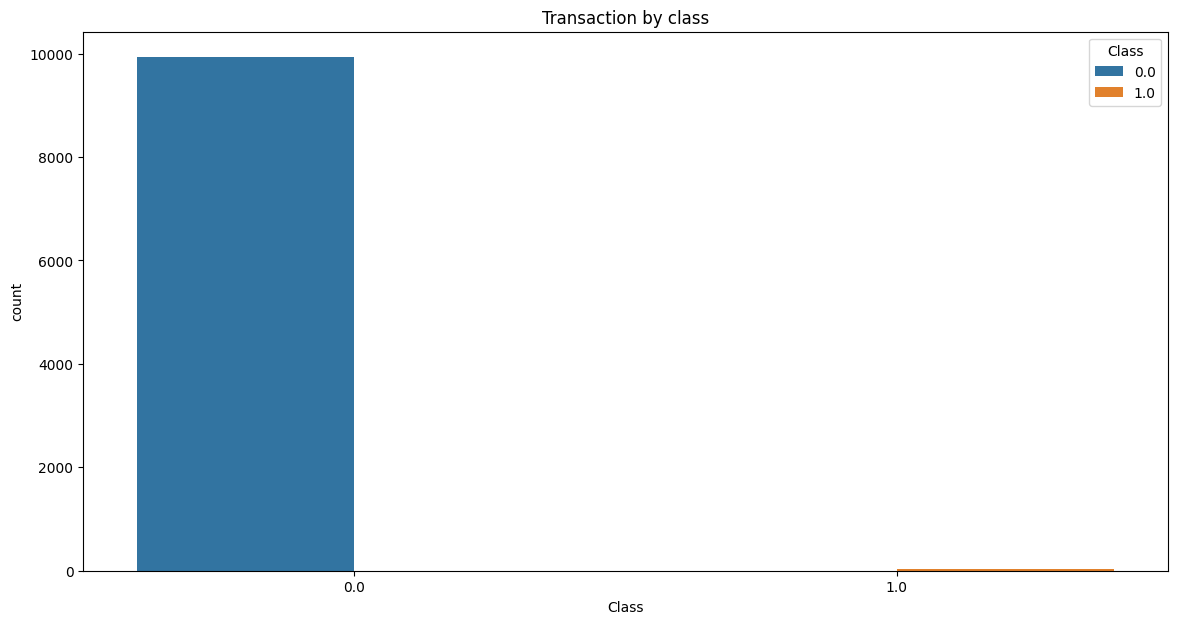

In [30]:
# plot a graph of the class 0 and 1
plt.figure(figsize=(14, 7))
fig = sns.countplot(dataset, x="Class", hue="Class")
fig.set(title="Transaction by class")

<Axes: xlabel='Class', ylabel='Amount'>

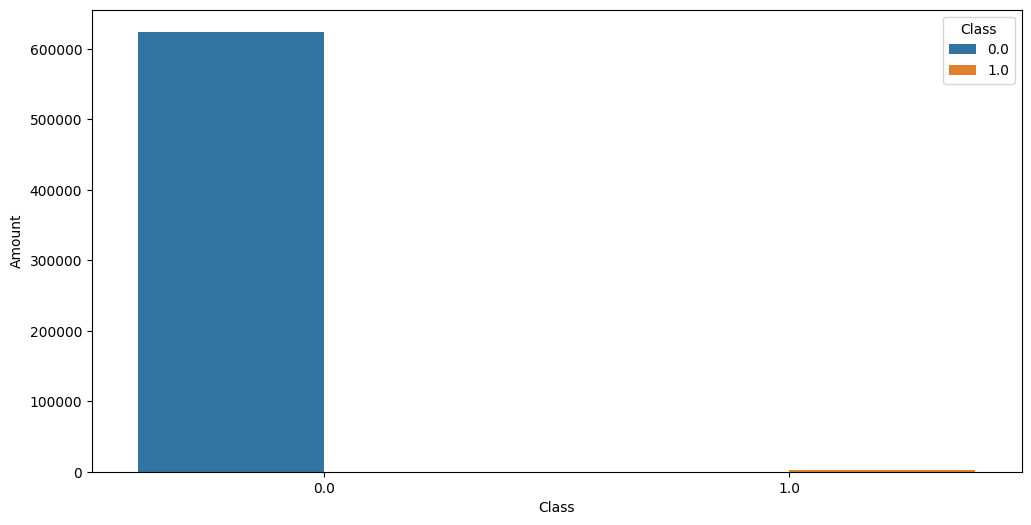

In [31]:
# group the data in Class and plot the amount
plt.figure(figsize=(12, 6))
sns.barplot(
    dataset.groupby("Class", as_index=False).sum(), x="Class", y="Amount", hue="Class"
)

In [32]:
# fraud data
fraud_dataset = dataset[dataset["Class"] == 1]
fraud_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
6331,7526,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1.0
6334,7535,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1.0
6336,7543,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1.0
6338,7551,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1.0
6427,7610,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1.0


[Text(0.5, 1.0, 'Distribution of time ')]

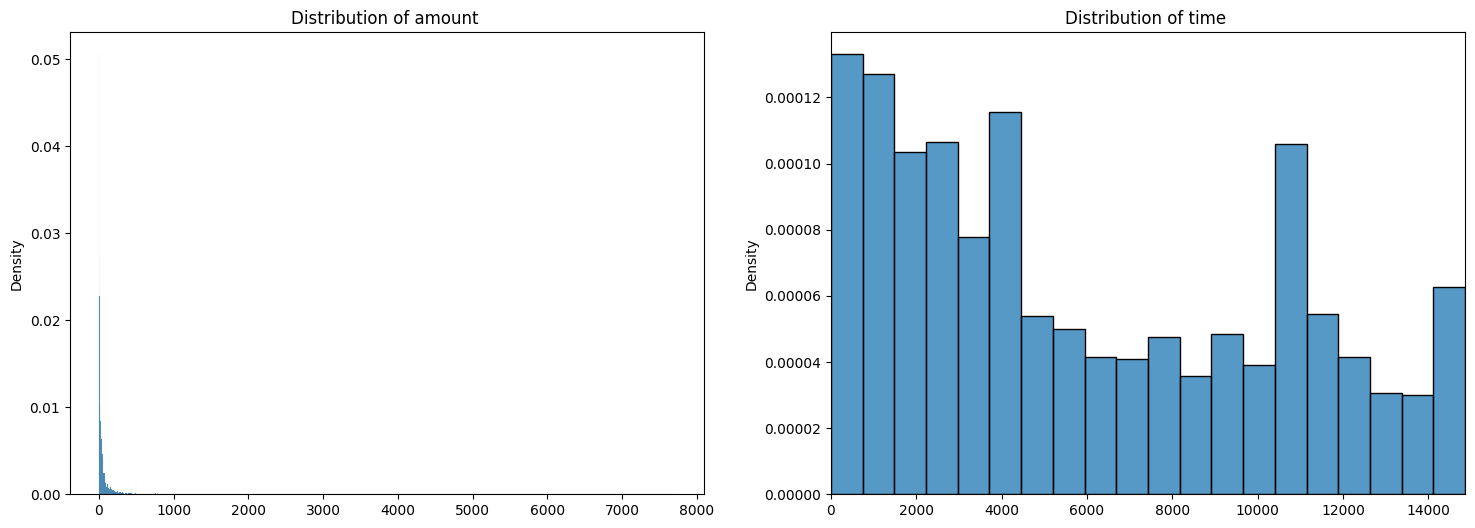

In [33]:
# distribution of amount and time in the dataset

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(dataset["Amount"].values, ax=ax[0], stat="density")
# ax[0].set_xlim(dataset['Amount'].min(), dataset['Amount'].max())
ax[0].set(title="Distribution of amount ")
sns.histplot(dataset["Time"].values, ax=ax[1], stat="density")
ax[1].set_xlim(dataset["Time"].min(), dataset["Time"].max())
ax[1].set(title="Distribution of time ")

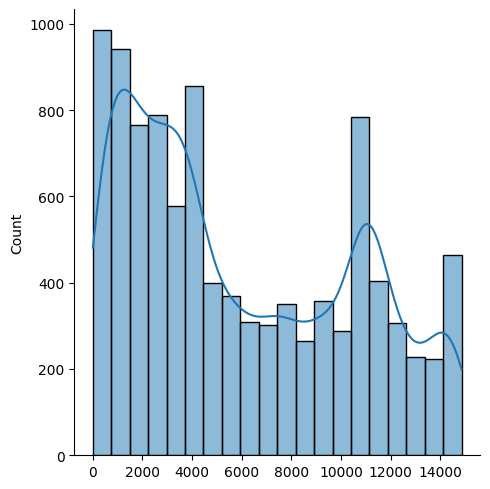

In [34]:
sns.displot(dataset["Time"].values, kde=True)

[Text(0.5, 1.0, 'Fraud Transaction Time vs Amount')]

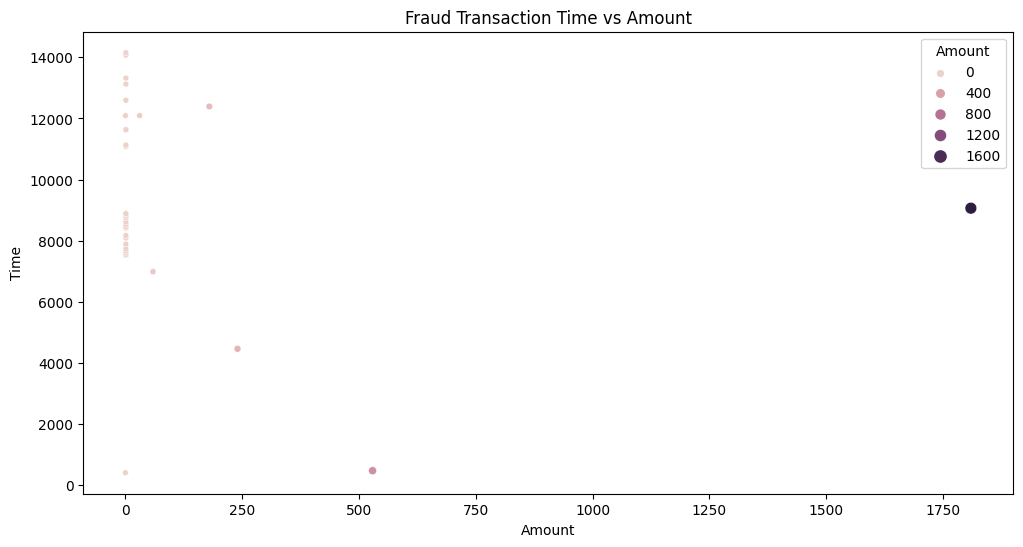

In [35]:
plt.figure(figsize=(12, 6))
fig = sns.scatterplot(fraud_dataset, x="Amount", y="Time", hue="Amount", size="Amount")
fig.set(title="Fraud Transaction Time vs Amount")

In [36]:
fraud_dataset[fraud_dataset["Amount"] == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.0,1.0
6331,7526,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.0,1.0
6334,7535,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.0,1.0
6336,7543,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.0,1.0
6338,7551,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.0,1.0
6427,7610,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.0,1.0
6446,7672,0.702710,2.426433,-5.234513,4.416661,-2.170806,-2.667554,-3.878088,0.911337,-0.166199,...,0.551180,-0.009802,0.721698,0.473246,-1.959304,0.319476,0.600485,0.129305,1.0,1.0
6472,7740,1.023874,2.001485,-4.769752,3.819195,-1.271754,-1.734662,-3.059245,0.889805,0.415382,...,0.343283,-0.054196,0.709654,-0.372216,-2.032068,0.366778,0.395171,0.020206,1.0,1.0
6529,7891,-1.585505,3.261585,-4.137422,2.357096,-1.405043,-1.879437,-3.513687,1.515607,-1.207166,...,0.501543,-0.546869,-0.076584,-0.425550,0.123644,0.321985,0.264028,0.132817,1.0,1.0
6609,8090,-1.783229,3.402794,-3.822742,2.625368,-1.976415,-2.731689,-3.430559,1.413204,-0.776941,...,0.454032,-0.577526,0.045967,0.461700,0.044146,0.305704,0.530981,0.243746,1.0,1.0


In [37]:
# most of tthe fraud transaction are 1
fraud_dataset["Amount"].mode()

0    1.0
Name: Amount, dtype: float64

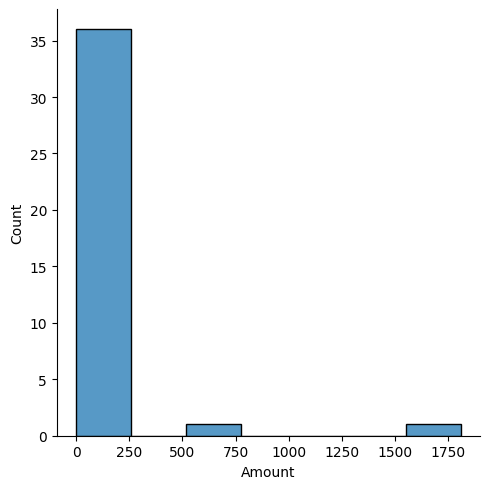

In [38]:
sns.displot(fraud_dataset, x="Amount")

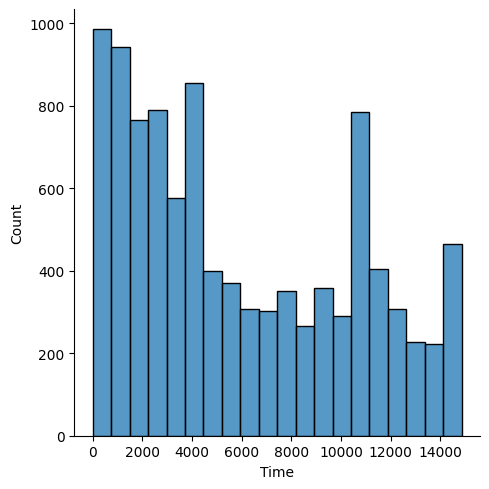

In [39]:
sns.displot(dataset, x="Time")

# Preprocessing

<li>scale the amount and time column
<li>create a balanced dataframe for training your model

Since we are dealing with a highly imbalanced dataset the way to mitigate this would be to use the 1. Undersampling and 2. Oversampling

In [40]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# add a scaled column of time and amount
rbs_scaler = RobustScaler()
dataset["scaled_amount"] = rbs_scaler.fit_transform(
    dataset["Amount"].values.reshape(-1, 1)
)
dataset["scaled_time"] = rbs_scaler.fit_transform(dataset["Time"].values.reshape(-1, 1))

# drop the nonscaled amount and time column
dataset.drop(columns=["Time", "Amount"], inplace=True)

In [41]:
dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,2.919037,-0.561148
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-0.289567,-0.561148
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,7.920729,-0.561025
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,2.348638,-0.561025
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,1.180106,-0.560901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959,1.180311,-0.268826,1.373170,-0.623739,-1.237326,-0.495057,-0.909022,-0.000706,2.961146,-1.437185,...,0.974244,-0.036893,0.383235,0.369188,-0.581899,0.098968,0.035401,0.0,-0.304635,1.269927
9960,1.286884,-0.124610,0.148283,-0.259343,0.248357,0.896718,-0.626627,0.227693,1.618678,-0.395130,...,-0.904515,-0.027985,-1.743540,0.090885,0.870425,-0.084116,-0.022744,0.0,-0.082328,1.270298
9961,1.318742,0.496408,0.114876,0.695262,0.170133,-0.537180,0.025492,-0.272931,1.267298,-0.672796,...,-1.111176,0.028259,-0.549934,0.328634,0.106061,-0.046154,0.017304,0.0,-0.309439,1.272396
9962,1.241757,0.419587,0.806183,0.894811,-0.507886,-1.118126,0.018908,-0.343335,1.210781,-0.455321,...,-0.817785,0.181425,0.662879,0.172535,0.033636,-0.051084,0.017208,0.0,-0.320140,1.272767


Undersampling technique of the imbalanced dataset

the technique is biased since it involves bringing down the the nonfraud data to match the fraud data ie information loss

In [42]:
# match the classses to be equal to one another

fraud = dataset[dataset["Class"] == 1]
non_fraud = dataset[dataset["Class"] == 0][: fraud.shape[0]]

In [43]:
print(fraud.shape)
print(non_fraud.shape)

(38, 31)
(38, 31)


In [44]:
# combine the two dataframe and reshafle to reorder the class
fraud_Nonfraud = pd.concat([fraud, non_fraud], ignore_index=True)
combined_df = fraud_Nonfraud.sample(frac=1,random_state=42)

In [45]:
combined_df.loc[:, "V14":][:10]

,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
4,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.0,-0.326473,0.366980
35,-18.049998,-1.366236,-9.723565,-14.744902,-5.247301,-0.574675,1.305862,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,1.0,-0.326473,1.083413
10,-6.763334,1.296860,-3.811758,-3.754128,-1.049177,1.554197,0.422743,0.551180,-0.009802,0.721698,0.473246,-1.959304,0.319476,0.600485,0.129305,1.0,-0.326473,0.385866
0,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1.0,-0.348310,-0.511032
45,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.0,0.542665,-0.560284
47,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0.0,-0.267948,-0.560037
65,0.171945,0.782167,-1.355871,-0.216935,1.271765,-1.240622,-0.522951,-0.284376,-0.323357,-0.037710,0.347151,0.559639,-0.280158,0.042335,0.028822,0.0,0.001092,-0.558309
53,-1.066604,1.106953,1.660114,-0.279265,-0.419994,0.432535,0.263451,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,0.0,0.000874,-0.559667
50,-0.317631,0.725675,-0.815612,0.873936,-0.847789,-0.683193,-0.102756,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,0.0,2.304963,-0.559914
28,-18.822087,-1.283129,-10.031097,-15.227008,-5.322009,-0.501751,1.382619,1.757085,-0.189709,-0.508629,-1.189308,1.188536,0.605242,1.881529,0.875260,1.0,-0.326473,0.874310


In [46]:
combined_df[combined_df["Class"] == 0].loc[:, "V14":]

,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
45,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.0,0.542665,-0.560284
47,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0.0,-0.267948,-0.560037
65,0.171945,0.782167,-1.355871,-0.216935,1.271765,-1.240622,-0.522951,-0.284376,-0.323357,-0.037710,0.347151,0.559639,-0.280158,0.042335,0.028822,0.0,0.001092,-0.558309
53,-1.066604,1.106953,1.660114,-0.279265,-0.419994,0.432535,0.263451,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,0.0,0.000874,-0.559667
50,-0.317631,0.725675,-0.815612,0.873936,-0.847789,-0.683193,-0.102756,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,0.0,2.304963,-0.559914
67,-0.039915,-0.218683,0.004476,-0.193554,0.042388,-0.277834,-0.178023,0.013676,0.213734,0.014462,0.002951,0.294638,-0.395070,0.081461,0.024220,0.0,-0.064639,-0.558309
70,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,0.0,-0.214227,-0.557939
58,-0.372651,-0.807980,-2.044557,0.515663,0.625847,-1.300408,-0.138334,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,0.0,4.711689,-0.559173
40,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,7.920729,-0.561025
39,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-0.289567,-0.561148


In [47]:
combined_df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
20,-1.863756,3.442644,-4.468260,2.805336,-2.118412,-2.332285,-4.261237,1.701682,-1.439396,-6.999907,...,-0.516242,-0.012218,0.070614,0.058504,0.304883,0.418012,0.208858,1.0,-0.326473,0.519796
60,1.166616,0.502120,-0.067300,2.261569,0.428804,0.089474,0.241147,0.138082,-0.989162,0.922175,...,-0.061972,-0.103855,-0.370415,0.603200,0.108556,-0.040521,-0.011418,0.0,-0.298521,-0.558926
71,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,...,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,0.0,-0.214227,-0.557939
14,0.857321,4.093912,-7.423894,7.380245,0.973366,-2.730762,-1.496497,0.543015,-2.351190,-3.944238,...,0.145400,0.240603,-0.234649,-1.004881,0.435832,0.618324,0.148469,1.0,-0.326473,0.447215
51,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,0.460230,...,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,0.0,0.252225,-0.559790


use correlation matrix to understand the data and a which features affect or determine a transaction to be fraud.


[Text(0.5, 1.0, 'Correlation of the columns in imbalanced dataset')]

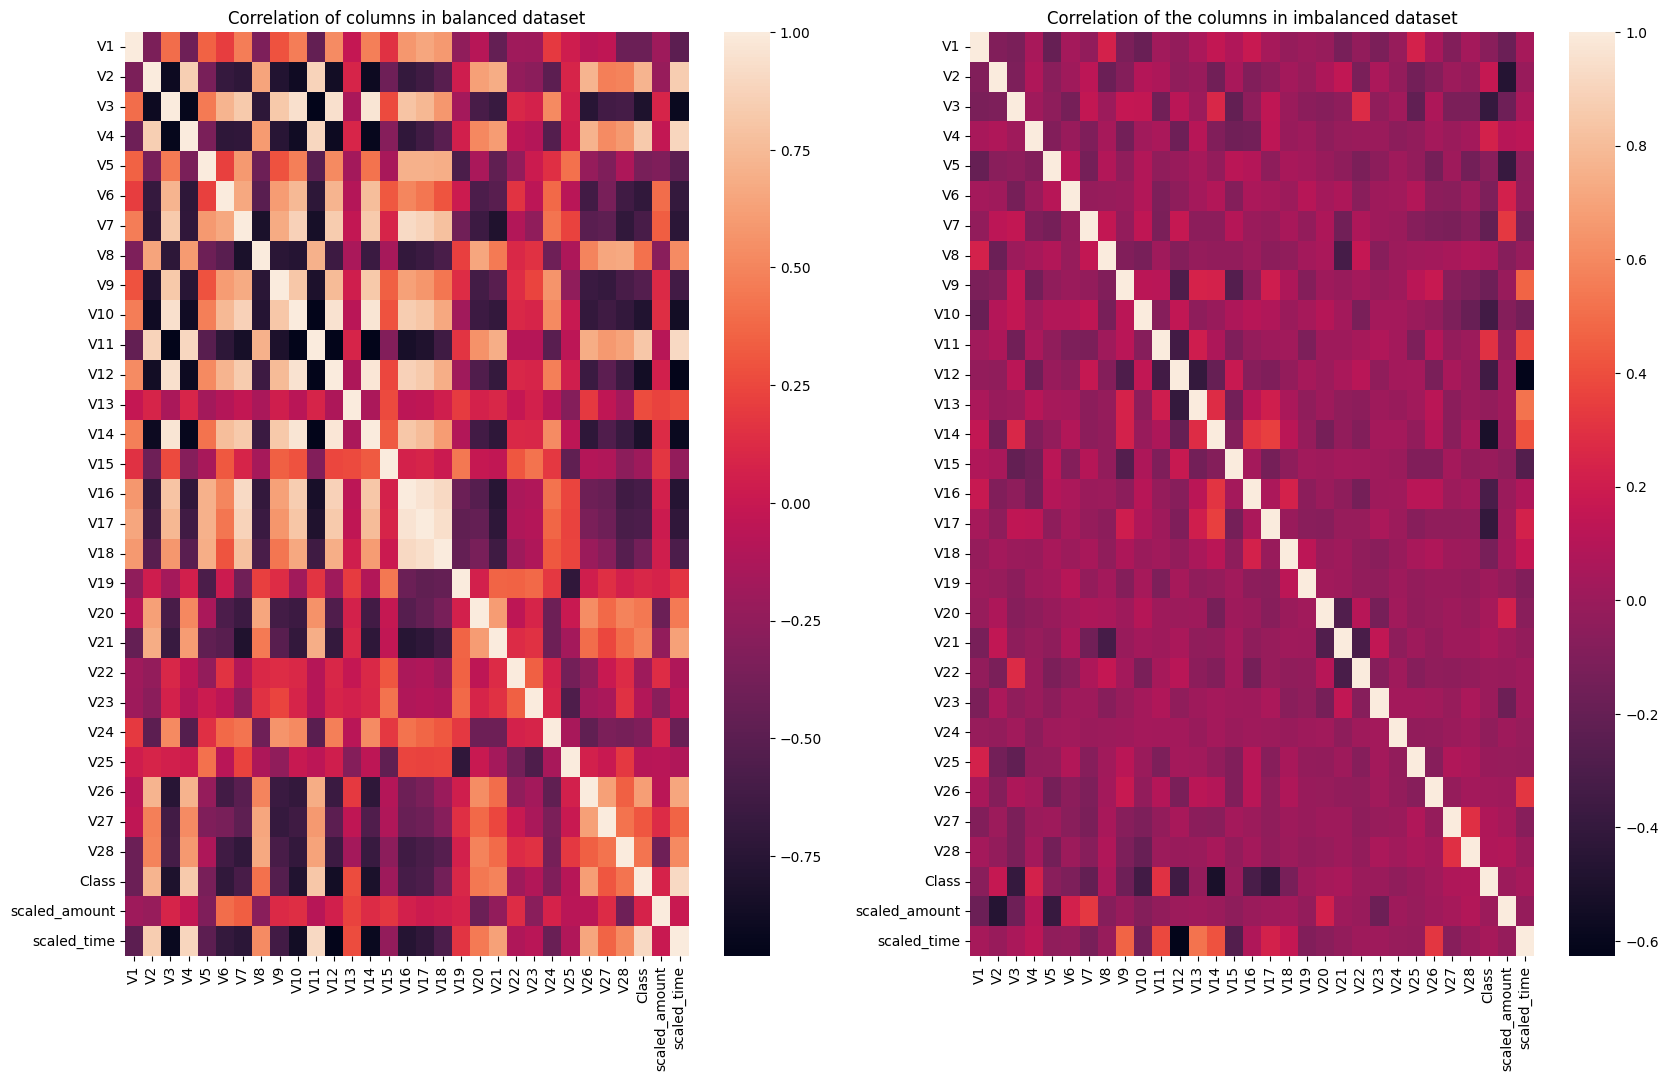

In [48]:
# use the seaborn function heatmap
# use pandas corr() function to compute the pairwise correlation of columns
fig, ax = plt.subplots(1, 2, figsize=(20, 12))
corr = combined_df.corr()
fig = sns.heatmap(corr, ax=ax[0])
fig.set(title="Correlation of columns in balanced dataset")

# correlation of the imbalanced data
# does not show any correlation between our features

corr = dataset.corr()
fig = sns.heatmap(corr, ax=ax[1])
fig.set(title="Correlation of the columns in imbalanced dataset")

[Text(0.5, 1.0, 'correlation of columns in balanced dataset')]

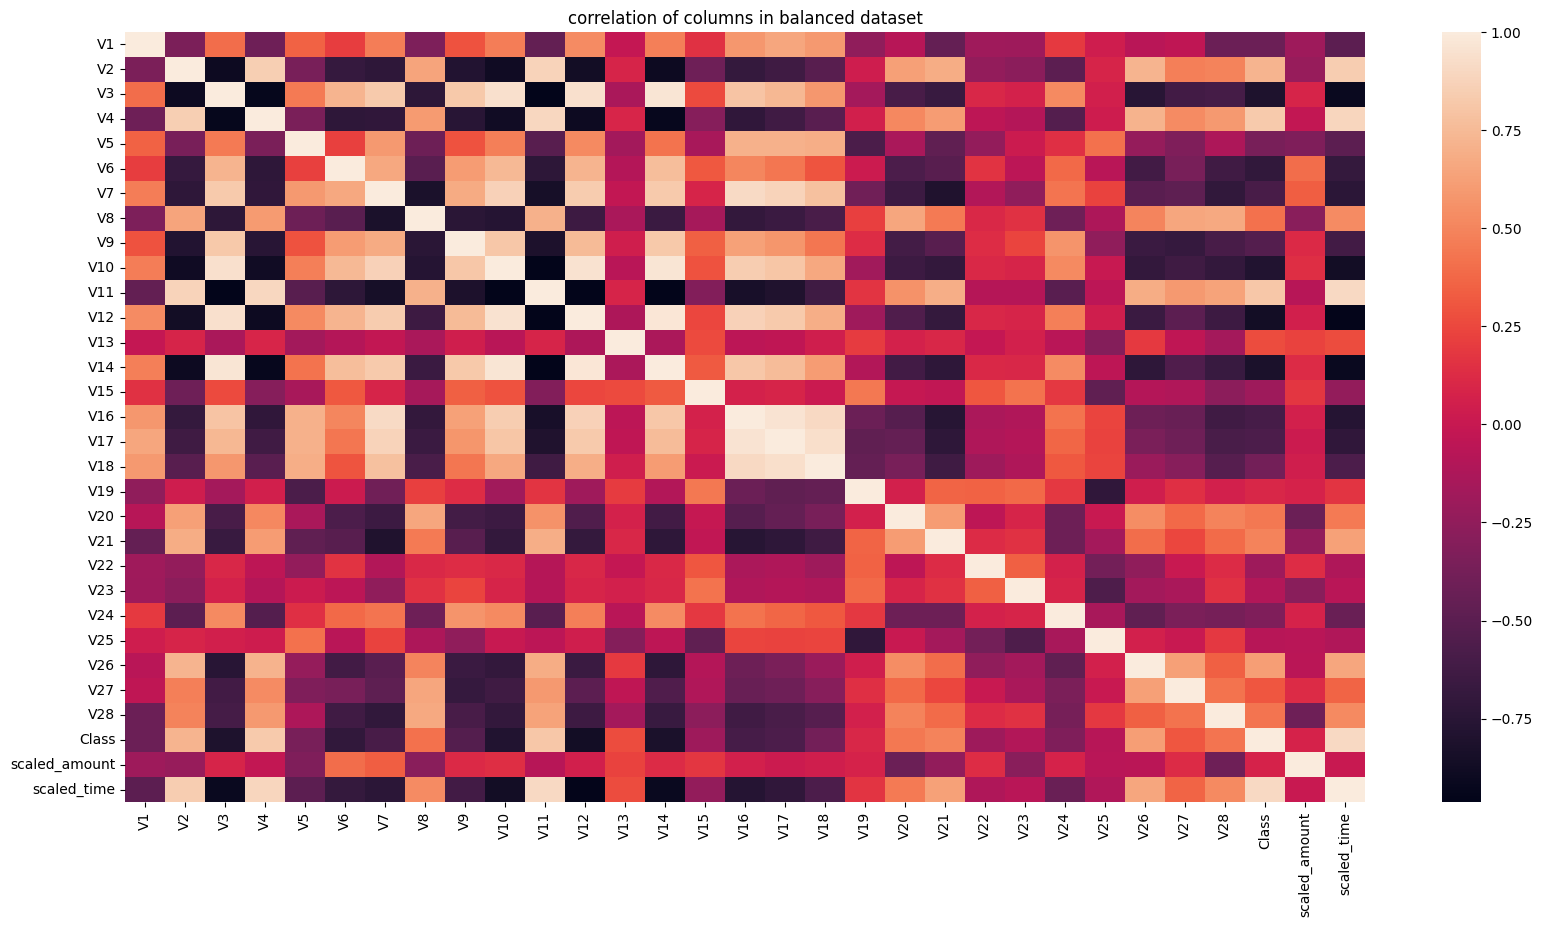

In [49]:
plt.figure(figsize=(20, 10))
corr = combined_df.corr()
fig = sns.heatmap(corr)
fig.set(title="correlation of columns in balanced dataset")

In [50]:
corr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
V1,1.000000,-0.343191,0.395490,-0.409122,0.352312,0.208017,0.467404,-0.336215,0.288883,0.467407,...,-0.181049,-0.188778,0.189819,0.038008,-0.072722,-0.042518,-0.421266,-0.422255,-0.193488,-0.488284
V2,-0.343191,1.000000,-0.901119,0.846708,-0.361380,-0.685619,-0.719469,0.641226,-0.781751,-0.881700,...,-0.235118,-0.275457,-0.493806,0.082383,0.720556,0.476725,0.488779,0.720721,-0.226158,0.841572
V3,0.395490,-0.901119,1.000000,-0.936922,0.453652,0.716492,0.826951,-0.726753,0.823517,0.943281,...,0.103005,0.069702,0.521192,0.053468,-0.749881,-0.617640,-0.604220,-0.802804,0.082227,-0.912581
V4,-0.409122,0.846708,-0.936922,1.000000,-0.351849,-0.722811,-0.712212,0.597265,-0.752475,-0.877676,...,-0.049713,-0.092796,-0.531203,0.032779,0.715348,0.525691,0.591762,0.826024,-0.025213,0.889620
V5,0.352312,-0.361380,0.453652,-0.351849,1.000000,0.222691,0.587214,-0.415088,0.289821,0.474211,...,-0.240930,0.021453,0.148396,0.411604,-0.232929,-0.331926,-0.125818,-0.356978,-0.326467,-0.488478
V6,0.208017,-0.685619,0.716492,-0.722811,0.222691,1.000000,0.659534,-0.506798,0.608191,0.746698,...,0.158128,-0.054054,0.379821,-0.068967,-0.619525,-0.362208,-0.630955,-0.706573,0.400025,-0.694121
V7,0.467404,-0.719469,0.826951,-0.712212,0.587214,0.659534,1.000000,-0.824130,0.674506,0.866564,...,-0.103923,-0.253680,0.427455,0.229813,-0.504160,-0.480475,-0.702080,-0.589043,0.335767,-0.735062
V8,-0.336215,0.641226,-0.726753,0.597265,-0.415088,-0.506798,-0.824130,1.000000,-0.740494,-0.768570,...,0.110336,0.151513,-0.406989,-0.122037,0.496208,0.650429,0.669154,0.413439,-0.280523,0.530601
V9,0.288883,-0.781751,0.823517,-0.752475,0.289821,0.608191,0.674506,-0.740494,1.000000,0.808877,...,0.126603,0.237632,0.567159,-0.251636,-0.657585,-0.681092,-0.590579,-0.530674,0.113982,-0.624222
V10,0.467407,-0.881700,0.943281,-0.877676,0.474211,0.746698,0.866564,-0.768570,0.808877,1.000000,...,0.105560,0.083756,0.517430,-0.002702,-0.696488,-0.638909,-0.697651,-0.788902,0.139736,-0.868311


[Text(0.5, 1.0, 'negative Correlation V14')]

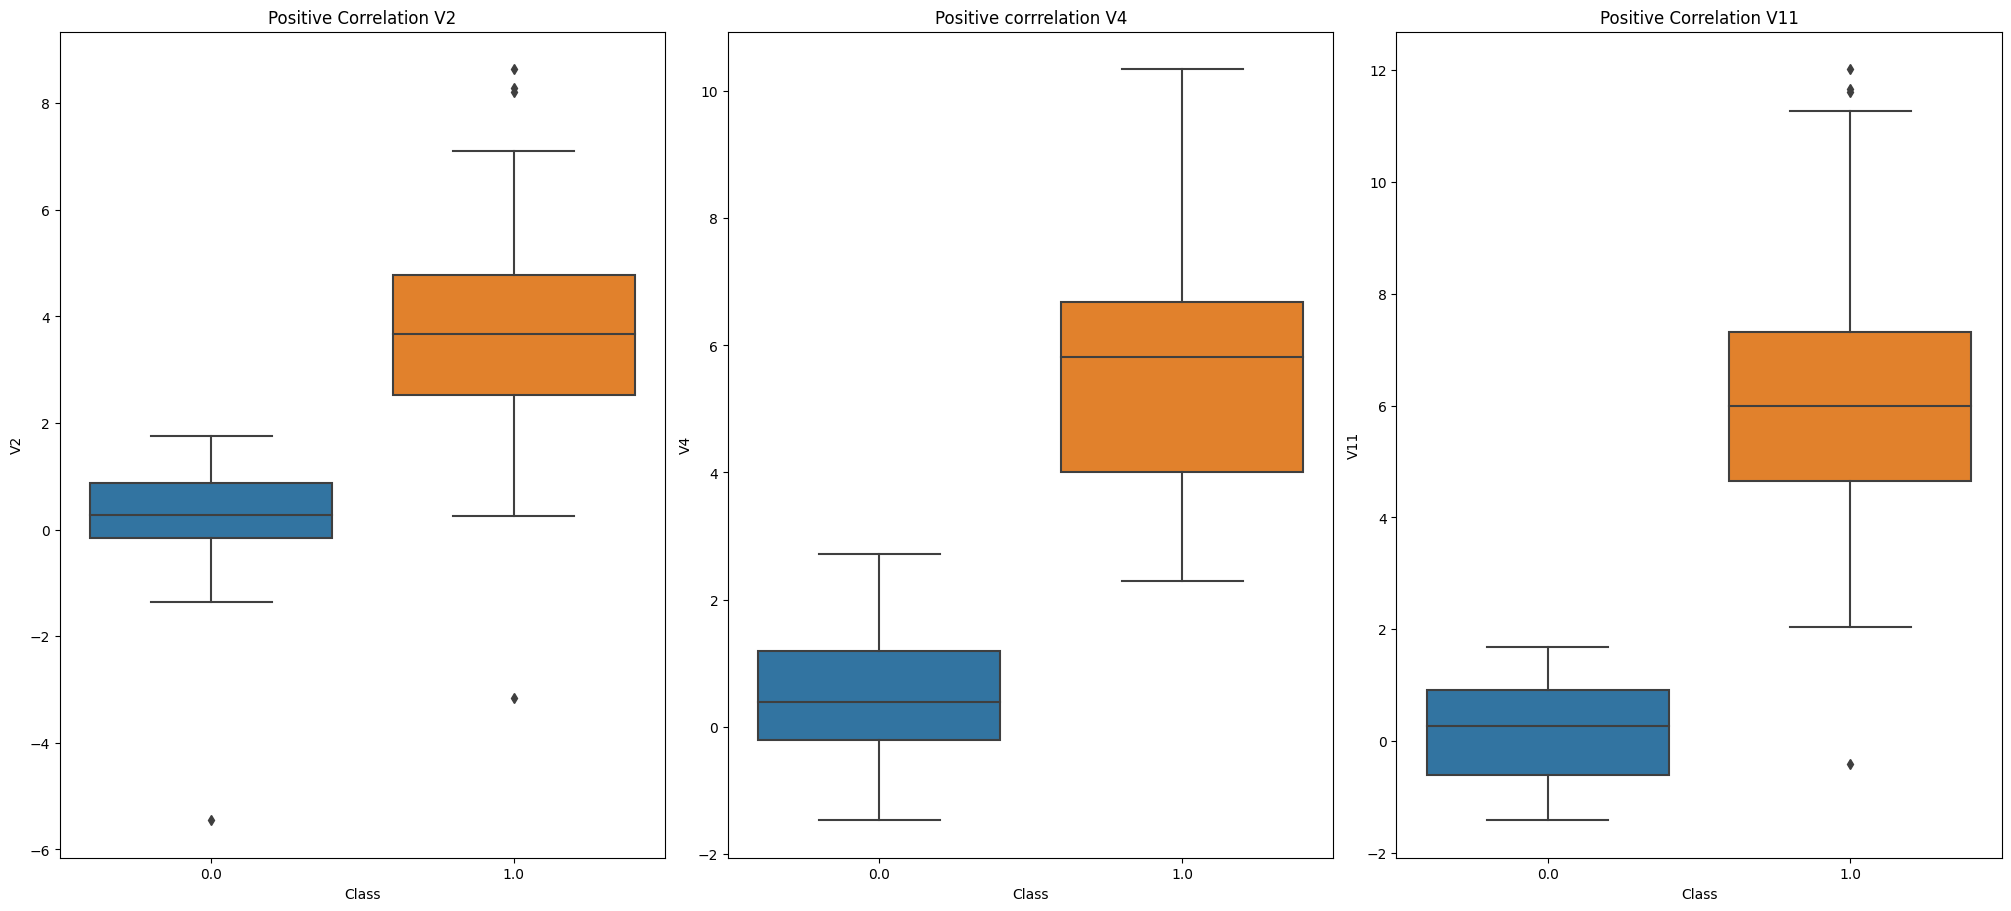

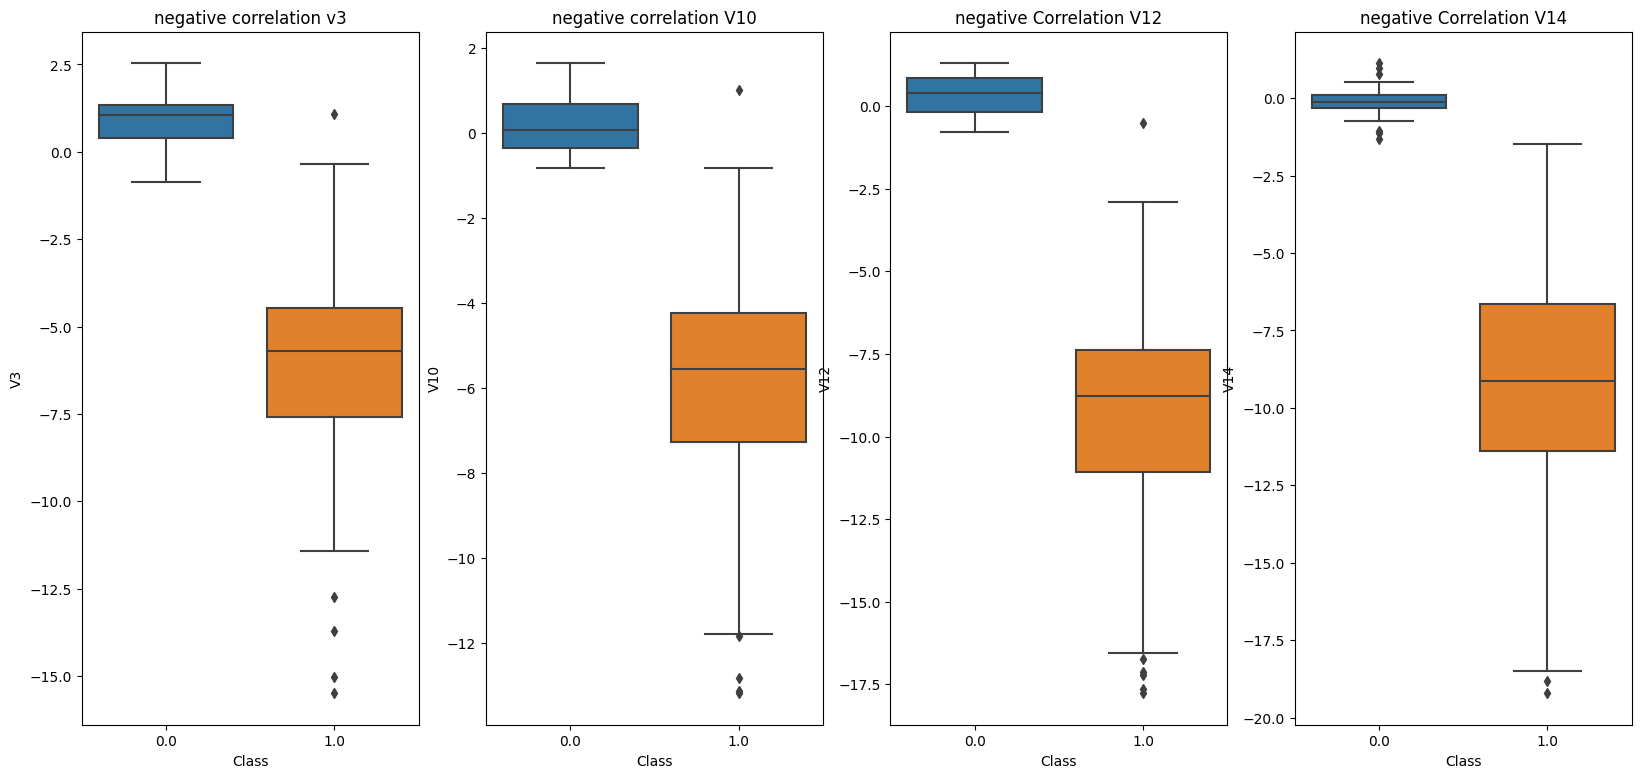

In [51]:
# plot a boxplot to show the correlation of the columns from our correlation matrix
# columns V2, V4, V10, V11, V12, V14, scaled_time

# positively correlated columns; highlighted with light color Feature V2, V4, V11
# positively correlated suggest that an increase in the value of the feature wil result to increased chance of it being fraudulent


# check correlation; read by checking the columns name and matching with the Class

fig, ax = plt.subplots(1, 3, figsize=(20, 9), layout="constrained")

sns.boxplot(data=combined_df, x="Class", y="V2", ax=ax[0])
ax[0].set(title="Positive Correlation V2")

sns.boxplot(data=combined_df, x="Class", y="V4", ax=ax[1])
ax[1].set(title="Positive corrrelation V4")

sns.boxplot(data=combined_df, x="Class", y="V11", ax=ax[2])
ax[2].set(title="Positive Correlation V11")

# negatively correlated columns; highlighted with dark color Feature V3, V10, V12, V14
# negatively correlated suggest the lower the value the higher the chance of it being fraudulent

fig, ax = plt.subplots(1, 4, figsize=(20, 9))

sns.boxplot(data=combined_df, x="Class", y="V3", ax=ax[0])
ax[0].set(title="negative correlation v3")

sns.boxplot(data=combined_df, x="Class", y="V10", ax=ax[1])
ax[1].set(title="negative correlation V10")

sns.boxplot(data=combined_df, x="Class", y="V12", ax=ax[2])
ax[2].set(title="negative Correlation V12")

sns.boxplot(data=combined_df, x="Class", y="V14", ax=ax[3])
ax[3].set(title="negative Correlation V14")
# do not forget wweare mainly interested in the fraudulent class

<Axes: ylabel='Density'>

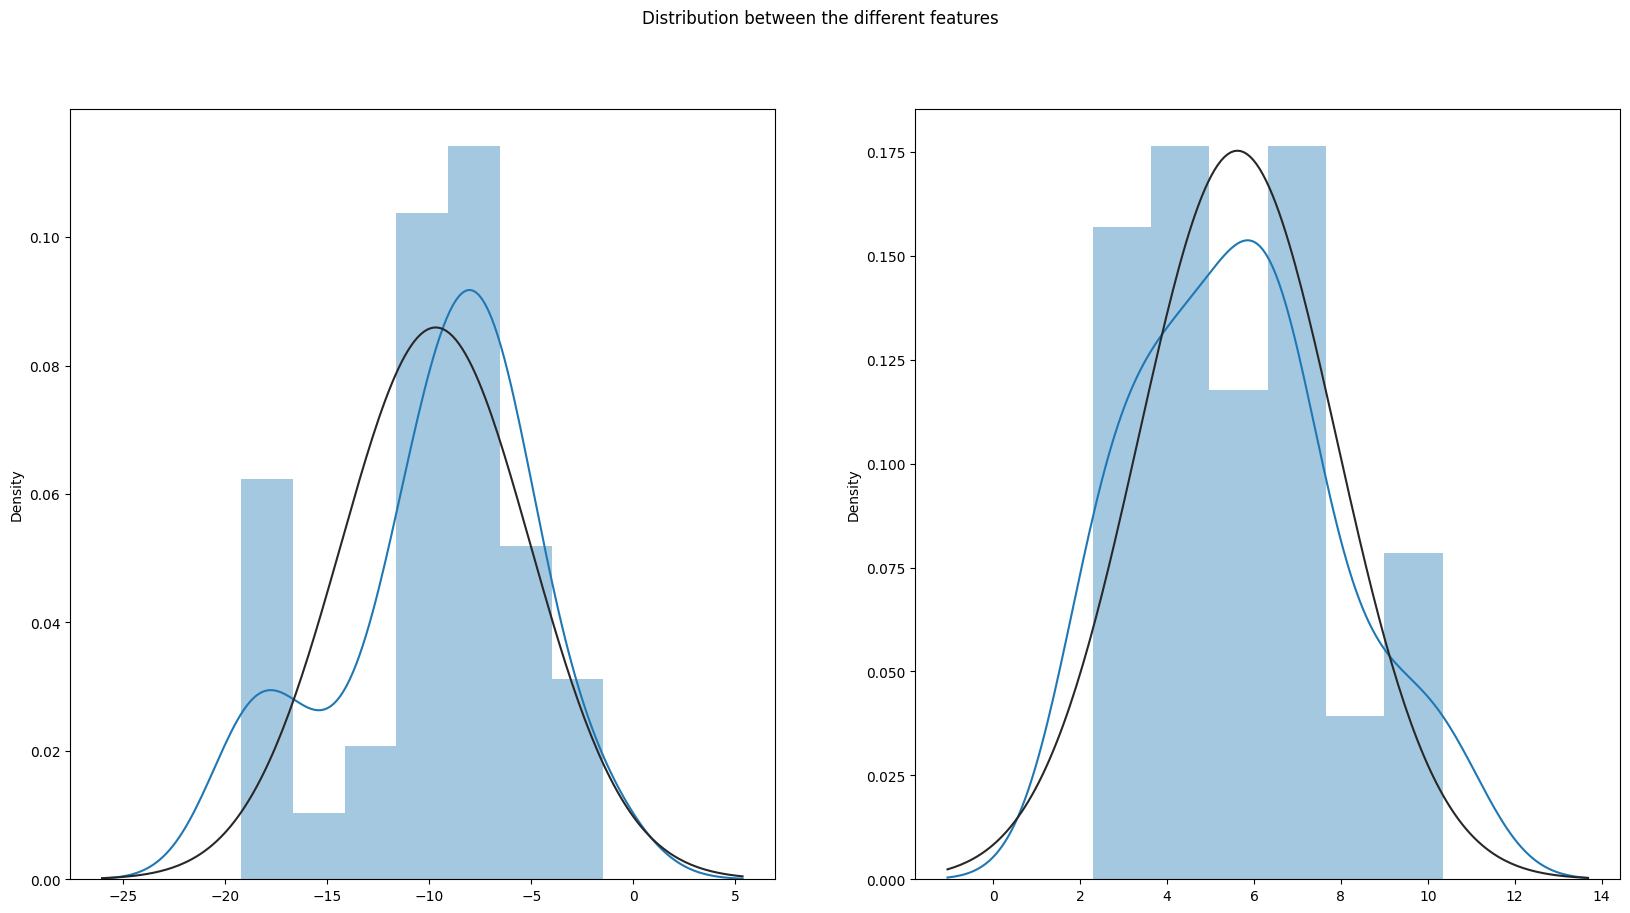

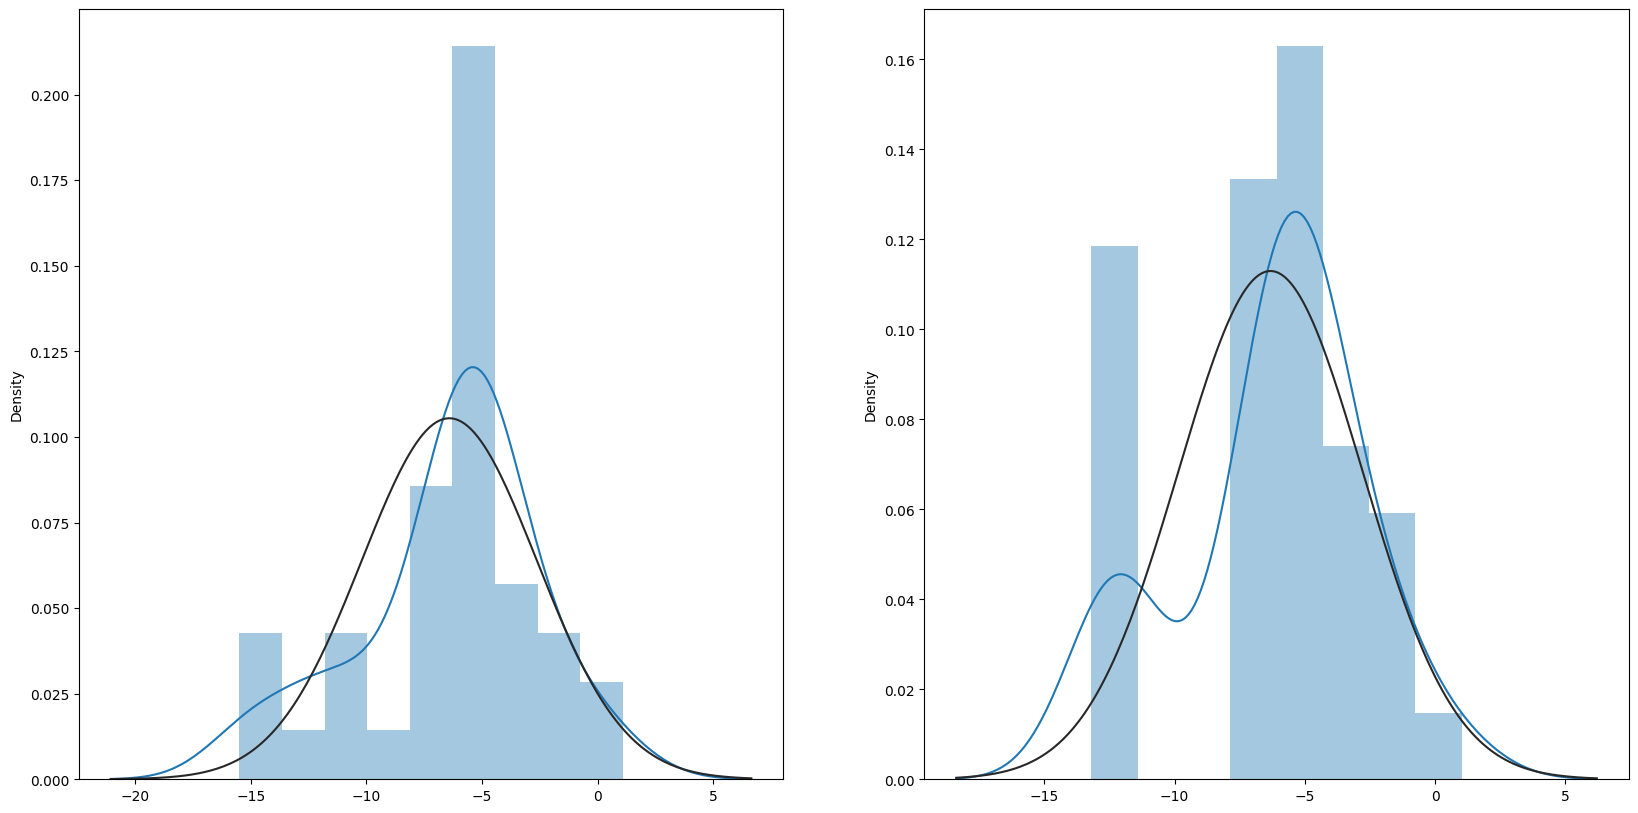

In [52]:
# review distribution of the features to detect the outliers
from scipy.stats import norm
#  norm plots a normal; gaussian distribution against the feature

# plots with almost normal distributions
fig, ax = plt.subplots(1,2, figsize=(20,10))
fig.suptitle('Distribution between the different features')
sns.distplot(combined_df[combined_df['Class'] == 1]['V14'].values, fit=norm,ax=ax[0])

sns.distplot(combined_df[combined_df['Class'] == 1]['V4'].values, fit=norm, ax=ax[1])

# plots with extreme outliers
fig, ax = plt.subplots(1,2, figsize=(20,10))
sns.distplot(combined_df[combined_df['Class'] == 1]['V3'].values, ax=ax[0], fit=norm)
sns.distplot(combined_df[combined_df['Class'] == 1]['V10'].values, ax=ax[1], fit=norm)


In [53]:
combined_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
4,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.0,-0.326473,0.366980
35,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,-13.136698,...,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,1.0,-0.326473,1.083413
10,0.702710,2.426433,-5.234513,4.416661,-2.170806,-2.667554,-3.878088,0.911337,-0.166199,-5.009249,...,-0.009802,0.721698,0.473246,-1.959304,0.319476,0.600485,0.129305,1.0,-0.326473,0.385866
0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1.0,-0.348310,-0.511032
45,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.0,0.542665,-0.560284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,-1.863756,3.442644,-4.468260,2.805336,-2.118412,-2.332285,-4.261237,1.701682,-1.439396,-6.999907,...,-0.516242,-0.012218,0.070614,0.058504,0.304883,0.418012,0.208858,1.0,-0.326473,0.519796
60,1.166616,0.502120,-0.067300,2.261569,0.428804,0.089474,0.241147,0.138082,-0.989162,0.922175,...,-0.061972,-0.103855,-0.370415,0.603200,0.108556,-0.040521,-0.011418,0.0,-0.298521,-0.558926
71,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,...,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,0.0,-0.214227,-0.557939
14,0.857321,4.093912,-7.423894,7.380245,0.973366,-2.730762,-1.496497,0.543015,-2.351190,-3.944238,...,0.145400,0.240603,-0.234649,-1.004881,0.435832,0.618324,0.148469,1.0,-0.326473,0.447215


In [54]:
# in this case lets remove outliers from the features V10,V12,V11, V3

# preocess of removing outliers will require to calculate the iqr
# iqr = 75percentile - 25percentile
# calulate the threshold of each column
# threshhold = iqr * 1.5
# interquartile range(iqr)
# the constant 1.5 is used inorder to detect more outliers the higher the value the less outliers we are able to detect
# we dont want the value to be too small since it may lead to information loss
# create an upper and lower bound of our columns to get rid of the outliers
# filter the dataset using the upper and lower bound
# upper_bound = 75percentile + threshold
# lower_bound =  25percentile -  threshold
# use numpy.percentile()  to calculate the percentiles of your features

# V10 Outliers
def anomaly_detection(col='', combined_df=combined_df):
  print(f'{"*" * 40} {col} Anomaly Detection {"*" *40}')
  V = combined_df[combined_df['Class'] == 1][col]
  V_25_percentile = np.percentile(V, 25)
  V_75_percentile = np.percentile(V,75)
  print(f"{col} 25 Percentile {V_25_percentile}")
  print(f"{col} 75 Percentile {V_75_percentile}")
  V_iqr = V_75_percentile - V_25_percentile
  print(f"Interquartile Range {col} {V_iqr}")
  V_threshold = V_iqr * 1.5
  print(f"{col} Threshold {V_threshold}")
  upper_bound = V_75_percentile + V_threshold
  lower_bound = V_25_percentile - V_threshold
  print(f"{col} lower bound {lower_bound}, upper bound {upper_bound}")
  V_outliers = [x for x  in V.values if x < lower_bound or x > upper_bound]
  print(f"Outliers {V_outliers} ")
  print(f"Number of outliers {len(V_outliers)}")
  df = combined_df[ (combined_df[col] > lower_bound )& (combined_df[col] < upper_bound)]
  clean_df = combined_df.drop(df.index,axis=0, )
  return df

# anomaly_detection('V10')
clean_df = anomaly_detection('V14')
# clean_df = anomaly_detection('V10')
# clean_df = anomaly_detection('V12')

# drop the outliers from the combined dataframe, be careful so that the data does not suffer information loss,
# avoid features that have too many outliers




**************************************** V14 Anomaly Detection ****************************************
V14 25 Percentile -11.388670153126625
V14 75 Percentile -6.646884786801823
Interquartile Range V14 4.741785366324803
V14 Threshold 7.112678049487204
V14 lower bound -18.50134820261383, upper bound 0.46579326268538157
Outliers [-18.8220867423816, -19.2143254902614] 
Number of outliers 2


In [55]:
clean_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
4,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.0,-0.326473,0.366980
35,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,-13.136698,...,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,1.0,-0.326473,1.083413
10,0.702710,2.426433,-5.234513,4.416661,-2.170806,-2.667554,-3.878088,0.911337,-0.166199,-5.009249,...,-0.009802,0.721698,0.473246,-1.959304,0.319476,0.600485,0.129305,1.0,-0.326473,0.385866
0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1.0,-0.348310,-0.511032
45,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.0,0.542665,-0.560284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,-2.535852,5.793644,-7.618463,6.395830,-0.065210,-3.136372,-3.104557,1.823233,-3.878658,-7.297803,...,-0.448060,-0.402407,-0.288835,1.011752,0.425965,0.413140,0.308205,1.0,-0.326473,0.535720
20,-1.863756,3.442644,-4.468260,2.805336,-2.118412,-2.332285,-4.261237,1.701682,-1.439396,-6.999907,...,-0.516242,-0.012218,0.070614,0.058504,0.304883,0.418012,0.208858,1.0,-0.326473,0.519796
71,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,...,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,0.0,-0.214227,-0.557939
14,0.857321,4.093912,-7.423894,7.380245,0.973366,-2.730762,-1.496497,0.543015,-2.351190,-3.944238,...,0.145400,0.240603,-0.234649,-1.004881,0.435832,0.618324,0.148469,1.0,-0.326473,0.447215


<Axes: xlabel='Class', ylabel='V14'>

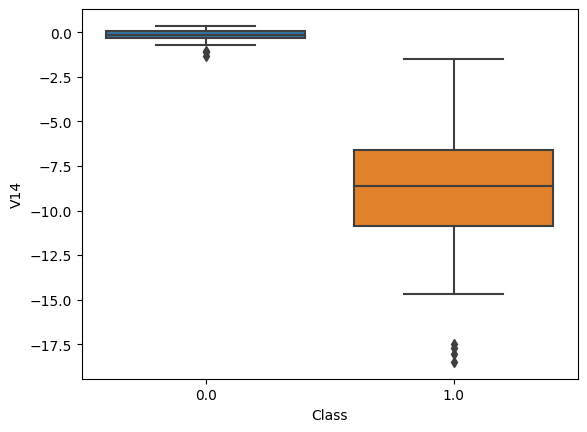

In [56]:
# remove outliers and plot the box and distribution plot
sns.boxplot(data=clean_df, x='Class', y='V14')

Dimensionality Reduction to judge how well our data will do with our machine learning model

In [57]:
from sklearn.decomposition import PCA, TruncatedSVD

X = clean_df.drop(columns='Class', axis=1)
y = clean_df['Class']

pca = PCA(n_components=2, random_state=42)
pca_dimensionality = pca.fit_transform(X)

tsvd = TruncatedSVD(n_components=2, random_state=42)
tsvd_dimension = tsvd.fit_transform(X)


[Text(0.5, 1.0, 'Dimensionality using TruncatedSVD')]

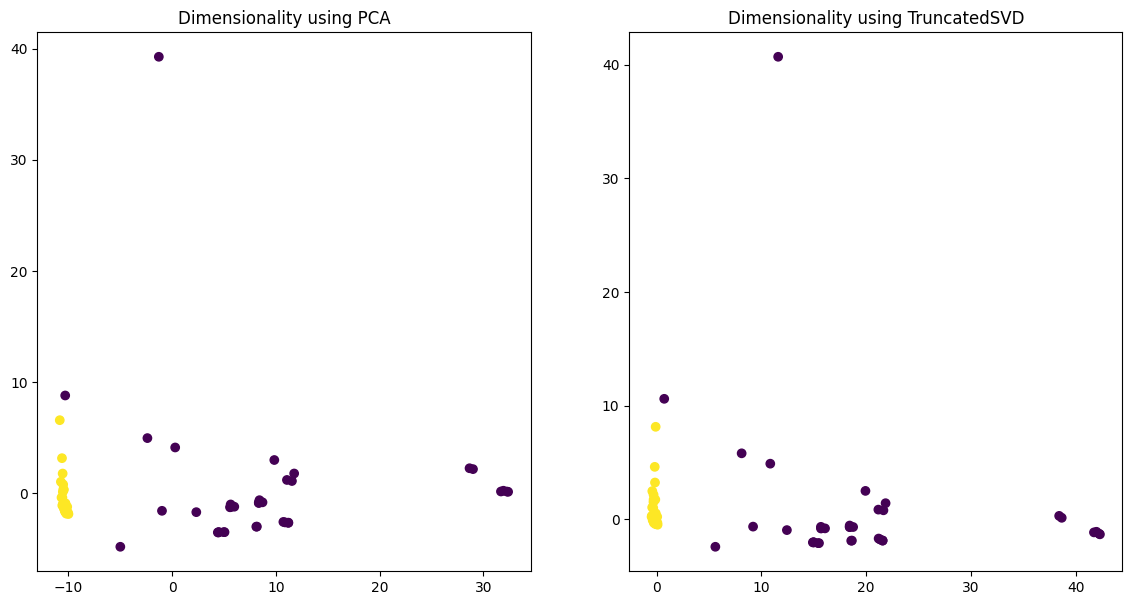

In [58]:
fig, ax = plt.subplots(1,2, figsize=(14,7))


ax[0].scatter(x=pca_dimensionality[:,0], y=pca_dimensionality[:,1],c=(y == 0))
ax[0].set(title='Dimensionality using PCA')
# ax.scatter(x=pca_dimensionality[:,0], y=pca_dimensionality[:,1],c=(y == 1), label='No fraud')

ax[1].scatter(x=tsvd_dimension[:,0], y=tsvd_dimension[:,1], c=(y==0))
ax[1].set(title='Dimensionality using TruncatedSVD')

# Model Training

In [59]:
# use different Classifiers to train your data and check their efficinency
# 1.Logistic Regression
# 2. RandomForestClassifier
# 3. KMeans
# 4. KNN

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# split the data to training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)



In [60]:
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)

# model score
y_predict = logistic_classifier.predict(X_test)

# classification score of the model
print(classification_report(y_test, y_predict))
print(accuracy_score(y_test, y_predict))
print(cross_val_score(logistic_classifier, X_train, y_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

1.0
[1.         1.         1.         0.90909091 1.        ]


In [61]:
Dt_classifier = DecisionTreeClassifier()
Dt_classifier.fit(X_train, y_train)

y_predict = Dt_classifier.predict(X_test)

print(classification_report(y_test, y_predict))
print(accuracy_score(y_test, y_predict))
print(cross_val_score(Dt_classifier, X_train, y_train))

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93         8
         1.0       0.86      1.00      0.92         6

    accuracy                           0.93        14
   macro avg       0.93      0.94      0.93        14
weighted avg       0.94      0.93      0.93        14

0.9285714285714286
[1.         1.         0.90909091 0.90909091 1.        ]


In [62]:
kn_classifier =  KNeighborsClassifier()
kn_classifier.fit(X_train, y_train)

y_predict = kn_classifier.predict(X_test)

print(classification_report(y_test, y_predict))
print(accuracy_score(y_test, y_predict))
print(cross_val_score(kn_classifier, X_train, y_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

1.0
[1.         1.         0.90909091 0.90909091 1.        ]


In [63]:
random_classifier = RandomForestClassifier()
random_classifier.fit(X_train, y_train)

y_predict = random_classifier.predict(X_test)

print(classification_report(y_test, y_predict))
print(accuracy_score(y_test, y_predict))
print(cross_val_score(random_classifier, X_train, y_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

1.0
[1.         1.         1.         0.90909091 1.        ]


<Axes: >

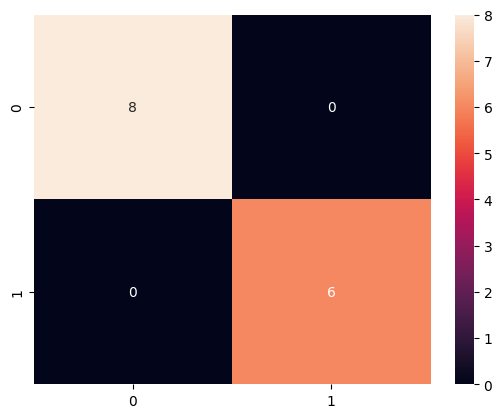

In [64]:
Lr_confusion_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(Lr_confusion_matrix,annot=True)